<a href="https://colab.research.google.com/github/smusman/Image-Classification-using-CNN/blob/main/Task2_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>Assignment 2<center/>
### <center>Image Classification Using CNN and Transfer Learning<center/>
#### <center>X-ray Classification<center/>

### Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/') 

Mounted at /content/drive/


### Importing packages

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from sklearn.datasets import load_files 
from keras.utils import np_utils
import numpy as np
import os
import zipfile
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.models import Model
from keras.preprocessing import image
import sklearn.metrics as metrics
import matplotlib.cm as cm
import seaborn as sns
from IPython.display import Image, display
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
%matplotlib inline

### Loading data

In [3]:
local_zip='/content/drive/MyDrive/Copy of 315_Birds_Species.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/Birds_Species')
zip_ref.close()

In [4]:
#Defining the directories
train_path = '/tmp/Birds_Species/train'
test_path = '/tmp/Birds_Species/test'

In [5]:
CLASSES = os.listdir(train_path)
NUM_CLASSES = len(CLASSES)

# Print the number of classes.
print("Number of Classes:", NUM_CLASSES)

# Print the list of classes.
print("Classes:", CLASSES)

Number of Classes: 315
Classes: ['GUINEAFOWL', 'COMMON HOUSE MARTIN', 'MALAGASY WHITE EYE', 'BLUE HERON', 'ENGGANO MYNA', 'OSTRICH', 'BORNEAN LEAFBIRD', 'MANDRIN DUCK', 'VENEZUELIAN TROUPIAL', 'GREY PLOVER', 'PALILA', 'SAMATRAN THRUSH', 'BROWN CREPPER', 'SRI LANKA BLUE MAGPIE', 'SORA', 'KOOKABURRA', 'BALI STARLING', 'PARADISE TANAGER', 'PURPLE SWAMPHEN', 'MYNA', 'INDIAN PITTA', 'LARK BUNTING', 'SMITHS LONGSPUR', 'COMMON LOON', 'BLUE COAU', 'OCELLATED TURKEY', 'BLACK TAIL CRAKE', 'BLUE GROUSE', 'BOBOLINK', 'COMMON FIRECREST', 'CRESTED NUTHATCH', 'SCARLET MACAW', 'COLLARED ARACARI', 'STRAWBERRY FINCH', 'RED BEARDED BEE EATER', 'DOWNY WOODPECKER', 'CHIPPING SPARROW', 'RED HEADED WOODPECKER', 'PUFFIN', 'CALIFORNIA GULL', 'ANNAS HUMMINGBIRD', 'ASIAN CRESTED IBIS', 'BLONDE CRESTED WOODPECKER', 'INCA TERN', 'RED TAILED THRUSH', 'CANARY', 'SHORT BILLED DOWITCHER', 'BAY-BREASTED WARBLER', 'TAIWAN MAGPIE', 'TREE SWALLOW', 'STORK BILLED KINGFISHER', 'BLACK SWAN', 'GRAY PARTRIDGE', 'CROWNED PIGEON

### Sample Display

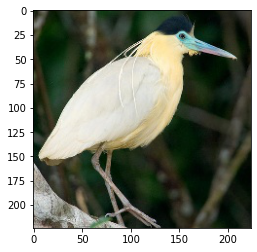

In [6]:
img = mpimg.imread(train_path + '/CAPPED HERON/001.jpg')
imgplot = plt.imshow(img)

### Data Augmentation using ImageDataGenerator 

In [7]:
train_datagen = ImageDataGenerator(
        rotation_range=40,                  #range within which to randomly rotate pictures
        width_shift_range=0.2,              #randomly translate pictures horizontally
        height_shift_range=0.2,             #randomly translate pictures vertically
        shear_range=0.2,                    #applying shear transformation
        zoom_range=0.2,                     #randomly zoom
        horizontal_flip=True,               #flip images horizontally
        fill_mode='nearest')

train_generator=train_datagen.flow_from_directory(
      train_path,
      target_size=(224,224),
      batch_size=32,
      class_mode='categorical'
)

test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=train_datagen.flow_from_directory(
      test_path,
      target_size=(224,224),
      batch_size=32,
      class_mode='categorical'
)

Found 45980 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.


### Loading ResNet 

In [8]:
IMAGE_SIZE = [224, 224]
transfer_model = ResNet50(
    input_shape=IMAGE_SIZE + [3],
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

94781440/94765736 [==============================] - 1s 0us/step


In [9]:
#do not use existing weights
for layer in transfer_model.layers:
    layer.trainable = False

In [11]:
inputs = transfer_model.input

layer_add = Dense(120, activation='relu')(transfer_model.output)
layer_add = Dense(120, activation='relu')(layer_add)

outputs = Dense(315, activation='softmax')(layer_add)

model = Model(inputs=inputs, outputs=outputs)

# Print the model summary.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

### Compile ResNet Model

In [12]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = [ 'accuracy' ]
)

### Train ResNet Model

In [13]:
history = model.fit(
    train_generator,
    validation_data = test_generator,
    epochs = 10,
)

Epoch 1/10
1437/1437 [==============================] - 734s 488ms/step - loss: 2.7396 - accuracy: 0.3688 - val_loss: 1.2596 - val_accuracy: 0.6597
Epoch 2/10
1437/1437 [==============================] - 701s 488ms/step - loss: 1.4472 - accuracy: 0.6158 - val_loss: 0.8597 - val_accuracy: 0.7524
Epoch 3/10
1437/1437 [==============================] - 699s 486ms/step - loss: 1.2058 - accuracy: 0.6732 - val_loss: 0.7242 - val_accuracy: 0.7943
Epoch 4/10
1437/1437 [==============================] - 699s 486ms/step - loss: 1.0757 - accuracy: 0.7055 - val_loss: 0.6948 - val_accuracy: 0.7873
Epoch 5/10
1437/1437 [==============================] - 705s 490ms/step - loss: 1.0097 - accuracy: 0.7208 - val_loss: 0.6264 - val_accuracy: 0.7968
Epoch 6/10
1437/1437 [==============================] - 698s 486ms/step - loss: 0.9516 - accuracy: 0.7378 - val_loss: 0.6003 - val_accuracy: 0.8178
Epoch 7/10
1437/1437 [==============================] - 695s 484ms/step - loss: 0.9003 - accuracy: 0.7491 - val_

### Learning Curves for ResNet

(0.0, 2.851073703169823)

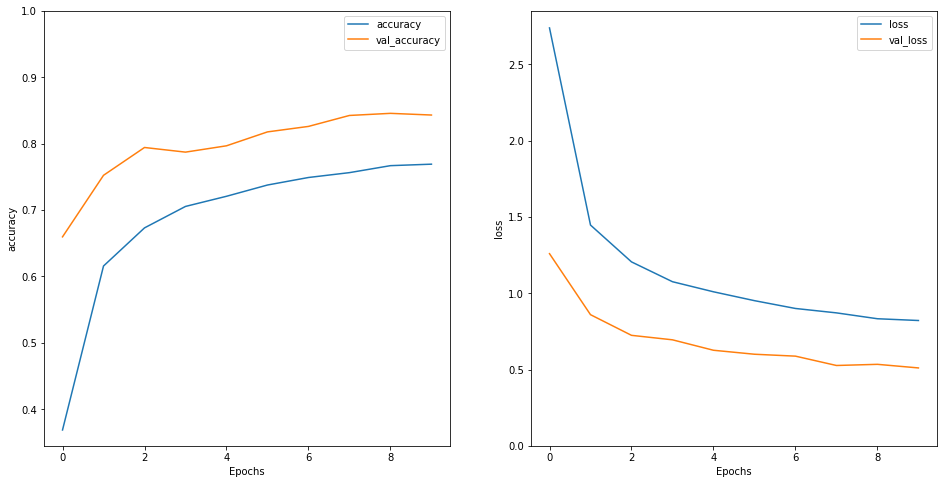

In [14]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)

### Quantitative Results ResNet (Loss and Accuracy)

In [15]:
result=model.evaluate(test_generator)
print('Loss:',result[0])
print('Accuracy:',result[1])

50/50 [==============================] - 23s 460ms/step - loss: 0.5084 - accuracy: 0.8521
Loss: 0.5084488391876221
Accuracy: 0.8520634770393372


### (Grad-CAM) Visualization


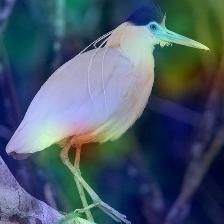

In [16]:
# Function to fetch an image in the form of an array.
def get_img_array(img_path, size):
    img = image.load_img(img_path, target_size = size)
    img_arr = image.img_to_array(img)
    img_arr = np.expand_dims(img_arr, axis=0)
    return img_arr

# Function to generate the Grad-CAM heatmap from https://keras.io/examples/vision/grad_cam/.
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions.
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer.
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer.
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel.
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation.
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1.
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

img_size = (224, 224)
last_conv_layer_name = "conv5_block3_3_conv"
img_path = train_path + '/CAPPED HERON/001.jpg'

img_arr = preprocess_input(get_img_array(img_path, size=img_size))

# Remove activation for the outermost layer.
model.layers[-1].activation = None

pred_res = model.predict(img_arr)

# Generate Grad-CAM heatmap.
heatmap = make_gradcam_heatmap(img_arr, model, last_conv_layer_name)

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = image.load_img(img_path)
    img = image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)